<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us check for the version of installed tensorflow.

In [ ]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.4.1


## 2. Setting Options

In [ ]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [ ]:
product_data = pd.read_csv("product_data.csv")
reviews_data = pd.read_csv("reviews.csv")

In [ ]:
product_data.head(5)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0000000,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0000000,0.0000000
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0000000,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.9500000,0.0000000
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7000000,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.9900000,0.0000000
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3000000,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.0000000,0.0000000
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1000000,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.9900000,0.0000000


In [ ]:
print('The product data has ', product_data.shape[0], 'rows and ',product_data.shape[1],'columns')

The product data has  720 rows and  10 columns


In [ ]:
reviews_data.sample(5)

,asin,name,rating,date,verified,title,body,helpfulVotes
18252,B014GCG150,Moon,4,"August 24, 2016",True,Four Stars,Good phone!,1.0000000
67450,B07YJHXZT6,Lashawn Moore,5,"December 14, 2019",True,Perfect Jump Start,I'm satisfied,nan
44663,B079142R7Y,Eugene Lavine,3,"August 21, 2018",True,It is usable.,So initially i was hyped about the dual rear c...,2.0000000
65477,B07VZL3L5V,Amazon Customer,5,"December 10, 2019",True,Great phone . Love it!,Awesome phone. All the features needed and loo...,nan
22370,B01D1J9BGU,Nadina,5,"November 18, 2016",True,Five Stars,ok,nan


In [ ]:
print('The reviews data has ', reviews_data.shape[0], 'rows and ',reviews_data.shape[1],'columns')

The reviews data has  67986 rows and  8 columns


## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [ ]:
product_data.columns

Index(['asin', 'brand', 'title', 'url', 'image', 'rating', 'reviewUrl',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

In [ ]:
product_data.drop(['url','image','reviewUrl'],axis=1,inplace=True)
product_data.sample(5)

,asin,brand,title,rating,totalReviews,price,originalPrice
324,B077NJQPGB,Apple,Apple iPhone 7 256GB Unlocked GSM 4G LTE Quad-...,3.6000000,8,256.8200000,0.0000000
472,B07JLF13KV,Samsung,"Samsung Galaxy S9 SM-G9600 Dual Sim 5.8"", Supe...",3.9000000,2,509.9900000,0.0000000
32,B009LRMQTG,Motorola,Telcel America Motorola Pre-Paid Cell Phone - ...,3.9000000,196,99.9900000,0.0000000
121,B01BHEBDVW,Motorola,Motorola Droid Maxx 2 XT1565 16 GB Verizon Pho...,3.1000000,26,0.0000000,0.0000000
84,B00PLBFPAS,Nokia,"Nokia Lumia 630 Windows Prepaid SmartPhone, Ca...",3.3000000,14,129.9900000,0.0000000


In [ ]:
print('The product data has ', product_data.shape[0], 'rows and ',product_data.shape[1],'columns')

The product data has  720 rows and  7 columns


### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [ ]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asin           720 non-null    object 
 1   brand          716 non-null    object 
 2   title          720 non-null    object 
 3   rating         720 non-null    float64
 4   totalReviews   720 non-null    int64  
 5   price          720 non-null    float64
 6   originalPrice  720 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 39.5+ KB


In [ ]:
product_data.describe( include='all')

,asin,brand,title,rating,totalReviews,price,originalPrice
count,720,716,720,720.0000000,720.0000000,720.0000000,720.0000000
unique,720,10,718,nan,nan,nan,nan
top,B07CHWTWYP,Samsung,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...",nan,nan,nan,nan
freq,1,346,2,nan,nan,nan,nan
mean,NaN,NaN,NaN,3.7137500,105.6791667,234.9489306,63.6907778
std,NaN,NaN,NaN,0.7160138,167.6011014,200.0084407,172.4053696
min,NaN,NaN,NaN,1.0000000,1.0000000,0.0000000,0.0000000
25%,NaN,NaN,NaN,3.3000000,7.0000000,97.5125000,0.0000000
50%,NaN,NaN,NaN,3.8000000,32.0000000,188.9750000,0.0000000
75%,NaN,NaN,NaN,4.1000000,122.2500000,336.7250000,0.0000000


#### Inference:
* There are 720 unique products(Asin count) in the product data of which 4 products are not updated with their brand name (716 count).
* The ratings are not integers. they are floating numbers ranging from 1 to 5.
* There are products with single review
* There are products with price/original price marked as zero for some products which seems incorrect. Such data counts are high as price mean (235)  is high wrto 50% IQR value (189).

In [ ]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67986 entries, 0 to 67985
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          67986 non-null  object 
 1   name          67984 non-null  object 
 2   rating        67986 non-null  int64  
 3   date          67986 non-null  object 
 4   verified      67986 non-null  bool   
 5   title         67972 non-null  object 
 6   body          67965 non-null  object 
 7   helpfulVotes  27215 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


In [ ]:
reviews_data.describe( include='all')

,asin,name,rating,date,verified,title,body,helpfulVotes
count,67986,67984,67986.0000000,67986,67986,67972,67965,27215.0000000
unique,720,47323,nan,2983,2,41489,59811,nan
top,B00F2SKPIM,Amazon Customer,nan,"December 11, 2019",True,Five Stars,Good,nan
freq,981,6507,nan,234,61225,6043,303,nan
mean,NaN,NaN,3.8079163,NaN,NaN,NaN,NaN,8.2296895
std,NaN,NaN,1.5829058,NaN,NaN,NaN,NaN,31.9548772
min,NaN,NaN,1.0000000,NaN,NaN,NaN,NaN,1.0000000
25%,NaN,NaN,3.0000000,NaN,NaN,NaN,NaN,1.0000000
50%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,2.0000000
75%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,5.0000000


#### Inference:
* In the review data also we have 720 unique products. Probably for all the products in the product data we have reviews available in review data.
* The ratings are properly given in the review data with range from 1 to 5.
* We have more products with higher ratings.
* All the reviews are tagged for reviews from verfied customer or not.

### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

In [ ]:
print(" Count of unique products in the Product Data :", product_data['asin'].nunique())
print(" Top Brand in the Product Data :", product_data['brand'].describe(include='object').top)
print(" Top Title in the Product Data :", product_data['title'].describe(include='object').top)
print(" Ratings range from ", reviews_data['rating'].min(), " to ",reviews_data['rating'].max())
print(" Price range from ", product_data['price'].min(), " to ",product_data['price'].max())

 Count of unique products in the Product Data : 720
 Top Brand in the Product Data : Samsung
 Top Title in the Product Data : Apple iPhone 6S, 64GB, Rose Gold - For AT&T / T-Mobile (Renewed)
 Ratings range from  1  to  5
 Price range from  0.0  to  999.99


### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

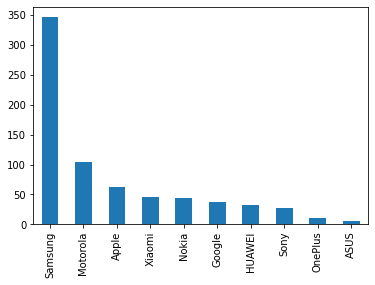

In [ ]:
product_data['brand'].value_counts().plot(kind='bar')

### 4.5 Display average rating per brand

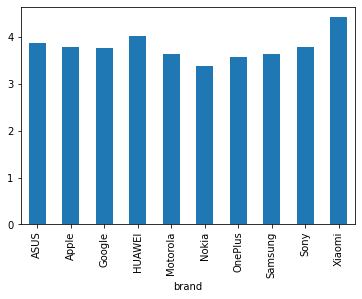

In [ ]:
product_data.groupby('brand').mean()['rating'].plot(kind='bar')

### 4.6 Display average price per brand

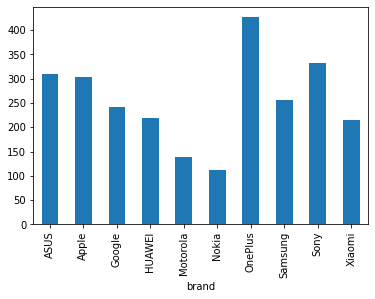

In [ ]:
product_data.groupby('brand').mean()['price'].plot(kind='bar')

### 4.7 Display average 'totalReviews' per brand

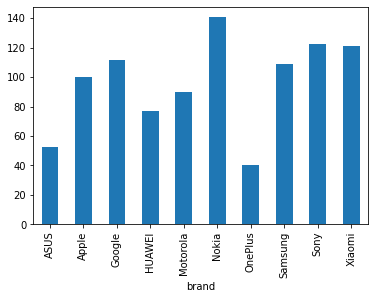

In [ ]:
product_data.groupby('brand').mean()['totalReviews'].plot(kind='bar')

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [ ]:
reviews = pd.merge(reviews_data, product_data, how="inner", on="asin")
reviews.shape

(67986, 14)

In [ ]:
reviews.columns

Index(['asin', 'name', 'rating_x', 'date', 'verified', 'title_x', 'body',
       'helpfulVotes', 'brand', 'title_y', 'rating_y', 'totalReviews', 'price',
       'originalPrice'],
      dtype='object')

### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [ ]:
reviews.rename(columns={"rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"},inplace=True)

In [ ]:
reviews.columns

Index(['asin', 'name', 'user_rating', 'date', 'verified', 'review_title',
       'body', 'helpfulVotes', 'brand', 'item_title', 'overall_rating',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [ ]:
reviews['verified'].value_counts()

True     61225
False     6761
Name: verified, dtype: int64

In [ ]:
reviews_df = reviews[reviews['verified'] == True]

In [ ]:
reviews_df.shape

(61225, 14)

### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

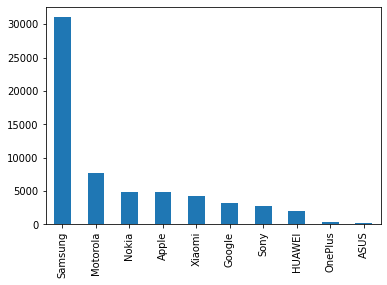

In [ ]:
reviews_df['brand'].value_counts().plot(kind='bar')

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [ ]:
reviews_df = reviews_df[['brand','body','user_rating','review_title']]
# Have dropped Price as we have many products marked with price zero which is incorrect.

In [ ]:
reviews_df.columns

Index(['brand', 'body', 'user_rating', 'review_title'], dtype='object')

In [ ]:
reviews_df.head()

,brand,body,user_rating,review_title
14,Motorola,DON'T BUY OUT OF SERVICE,1,Stupid phone
17,Motorola,1 star because the phones locked so I have to ...,1,Phones locked
18,Motorola,The product has been very good. I had used thi...,5,Excellent product
21,Motorola,I bought this phone to replace an LG phone tha...,4,"Nice, but"
22,Motorola,I purchased this phone for my AT&T phone repla...,1,It seems it doesn't work with the existing AT&...


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

In [ ]:
# Since price is having 0 values in the dataset so we drop the price columns

In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61225 entries, 14 to 67984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         61078 non-null  object
 1   body          61207 non-null  object
 2   user_rating   61225 non-null  int64 
 3   review_title  61211 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
reviews_df['user_rating'].value_counts()

5    35001
1    10910
4     7938
3     4128
2     3248
Name: user_rating, dtype: int64

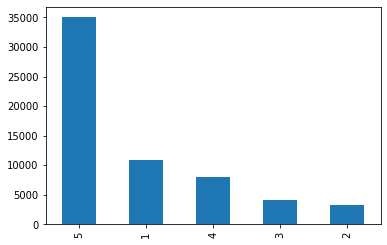

In [ ]:
reviews_df['user_rating'].value_counts().plot(kind='bar')

* We have more products which are high rated. There is a chance of bias towards high rated products while analysing the data using ML algorithm

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (neutral) if the user_Rating == 3, and -1 (negative) is the user_Rating is less than 3.

In [ ]:
reviews_df['sentiment'] = reviews_df['user_rating'].apply(lambda x: 1 if x >3 else (0 if x == 3 else (-1)) )

In [ ]:
reviews_df['sentiment'].value_counts()

 1    42939
-1    14158
 0     4128
Name: sentiment, dtype: int64

### 4.15 Check frequency distribution of the 'sentiment'

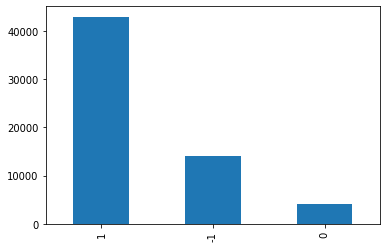

In [ ]:
reviews_df['sentiment'].value_counts().plot(kind='bar')

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

In [ ]:
pd.crosstab(reviews_df['sentiment'],reviews_df['brand']).T

sentiment,-1,0,1
brand,,,
ASUS,49,20,137
Apple,1320,307,3249
Google,804,207,2152
HUAWEI,261,105,1653
Motorola,1667,553,5494
Nokia,1437,467,2974
OnePlus,34,11,259
Samsung,7469,2030,21521
Sony,663,216,1812


* Seems we have good brand mobile products as we have higher count of high rated products against each brand.
* Samsung being the top in terms of product count as well as high rated products.

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will ppeform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [ ]:
if reviews_df['body'].dtype == np.object:
    print("Data type of column 'body' is string")

Data type of column 'body' is string


In [ ]:
reviews_df['body'].head()

14                             DON'T BUY OUT OF SERVICE
17    1 star because the phones locked so I have to ...
18    The product has been very good. I had used thi...
21    I bought this phone to replace an LG phone tha...
22    I purchased this phone for my AT&T phone repla...
Name: body, dtype: object

In [ ]:
reviews_df['body'] = reviews_df['body'].astype(str).apply(lambda x: x.lower()) #converting the data content in body column to lower case

In [ ]:
reviews_df['body'].head()

14                             don't buy out of service
17    1 star because the phones locked so i have to ...
18    the product has been very good. i had used thi...
21    i bought this phone to replace an lg phone tha...
22    i purchased this phone for my at&t phone repla...
Name: body, dtype: object

In [ ]:
reviews_df.sample(5)

,brand,body,user_rating,review_title,sentiment
59940,Xiaomi,been using this phone for about 3months now. i...,5,Great value - Astounding camera.,1
381,Motorola,it is supposed to be rugged military grade and...,1,Don't buy from this seller,-1
24808,Samsung,my galaxy s5 finally died and i didn't want to...,5,Great phone new out of the box,1
35164,Samsung,like,5,Bueno,1
65526,Samsung,met all the expectations,5,Very good phone,1


### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [ ]:
reviews_df['body'] = reviews_df['body'].replace('[^\w\s]','',regex = True) # ^ indicates except w - Alphabets/numbers and s-space

In [ ]:
reviews_df['body'].head()

14                              dont buy out of service
17    1 star because the phones locked so i have to ...
18    the product has been very good i had used this...
21    i bought this phone to replace an lg phone tha...
22    i purchased this phone for my att phone replac...
Name: body, dtype: object

### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop = set(stopwords.words('english'))

In [ ]:
reviews_df['body'] = reviews_df['body'].apply(lambda words:" ".join (word for word in words.split() if word not in stop))

In [ ]:
reviews_df['body'].sample(2)

59694                                        muy confiable
60749    spectacular product loved fantastic biometric ...
Name: body, dtype: object

### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [ ]:
def lemmatize_text(text):
  out_text = ' '.join([lemmatizer.lemmatize(word) for word in w_tokenizer.tokenize(text)])
  return out_text

In [ ]:
reviews_df['keywords'] = reviews_df['body'].apply(lemmatize_text)

In [ ]:
reviews_df.head(5)

,brand,body,user_rating,review_title,sentiment,keywords
14,Motorola,dont buy service,1,Stupid phone,-1,dont buy service
17,Motorola,1 star phones locked pay additional fees unlock,1,Phones locked,-1,1 star phone locked pay additional fee unlock
18,Motorola,product good used cell phone one projects work...,5,Excellent product,1,product good used cell phone one project worke...
21,Motorola,bought phone replace lg phone didnt like expec...,4,"Nice, but",1,bought phone replace lg phone didnt like expec...
22,Motorola,purchased phone att phone replacement even tho...,1,It seems it doesn't work with the existing AT&...,-1,purchased phone att phone replacement even tho...


### 5.5 Write a function to check word frequency of the text

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def CountFreq(text):
  CVect = CountVectorizer()
  tf = pd.DataFrame(CVect.fit_transform(text).toarray(),columns=CVect.get_feature_names()).T
  return tf

sample_text = reviews_df['body'].iloc[1:5]
print("Sample text:\n", sample_text)
CountFreq(sample_text)


Sample text:
 17      1 star phones locked pay additional fees unlock
18    product good used cell phone one projects work...
21    bought phone replace lg phone didnt like expec...
22    purchased phone att phone replacement even tho...
Name: body, dtype: object


,0,1,2,3
10,0,0,1,0
accidentally,0,0,1,0
additional,1,0,0,0
anyone,0,1,0,0
aside,0,0,1,0
att,0,0,0,2
bar,0,0,1,0
battery,0,0,1,0
bought,0,0,1,0
buttons,0,0,1,0


### 5.6 Check word frequency of review having top ratings (sentiment = 1) and display output of few samples

In [ ]:
sample_text = reviews_df[reviews_df['sentiment'] == 1].body.iloc[10:15]
print("Sample text:\n", sample_text)
CountFreq(sample_text)


Sample text:
 51    good phone works well simple usedropped times ...
52    get basic functions cell phone needed words ph...
64    replacement one mom went south us cant really ...
65    shipping time phone great phone also works gre...
67                                   delivered promised
Name: body, dtype: object


,0,1,2,3,4
also,0,0,0,1,0
area,0,0,0,1,0
basic,0,1,0,0,0
battery,0,0,0,1,0
buy,0,0,0,1,0
cant,0,0,1,0,0
card,0,0,0,1,0
carrier,0,0,2,0,0
case,0,0,1,0,0
cell,0,1,0,0,0


### 5.7 Initialize tf-idf vectorizer and transform the preprocessed body text

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vec = TfidfVectorizer()

In [ ]:
tfidf_trans = tfidf_vec.fit_transform(reviews_df['body']) 
X = tfidf_trans

### 5.8 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [ ]:
y = reviews_df['sentiment']

### 5.9 Split the data into Train & Test Sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print("Data Feature shape count:", X.shape)
print("Data Label shape count:", y.shape)
print("x Train shape count:", x_train.shape)
print("y Train shape count:", y_train.shape)
print("x Test shape count:", x_test.shape)
print("y Test shape count:", y_test.shape)

Data Feature shape count: (61225, 38370)
Data Label shape count: (61225,)
x Train shape count: (48980, 38370)
y Train shape count: (48980,)
x Test shape count: (12245, 38370)
y Test shape count: (12245,)


## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier() # using defaults hyperparameters with n_estimators =100, criterion = gini 

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn import metrics
print('Training Accuracy :%.2f' %(metrics.accuracy_score(y_train, rf.predict(x_train))*100))
print('Testing Accuracy :%.2f' %(metrics.accuracy_score(y_test, rf.predict(x_test))*100))

Training Accuracy :99.50
Testing Accuracy :86.11


In [ ]:
from sklearn.metrics import confusion_matrix
data= pd.DataFrame(confusion_matrix(y_test, rf.predict(x_test)))
data

,0,1,2
0,2120,7,708
1,243,67,510
2,229,4,8357


In [ ]:
print(metrics.classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

          -1       0.82      0.75      0.78      2835
           0       0.86      0.08      0.15       820
           1       0.87      0.97      0.92      8590

    accuracy                           0.86     12245
   macro avg       0.85      0.60      0.62     12245
weighted avg       0.86      0.86      0.84     12245



## 7. Write your conclusion

* We have preety good accuracy score of 86%.
* However, data being imbalanced for +ve sentimental more comapred to -ve sentimental products we observe the bias. Hence the recall and f1 score is high for +ve sentimentatl with support of 8590.
* We would be able to predict sentiments for high rated products more accurately than the low rated products.
* We need to balance by either under sampling or over sampling technique and do the train test split for applying ensemble technique algoritm

### THANK YOU